In [29]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

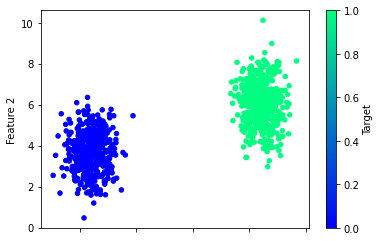

In [30]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [31]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [32]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [33]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [34]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [35]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [36]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 3         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [37]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [38]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7751 - accuracy: 0.3547
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7635 - accuracy: 0.1547
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7537 - accuracy: 0.1613
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7449 - accuracy: 0.1707
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7377 - accuracy: 0.1800
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7312 - accuracy: 0.1960
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7257 - accuracy: 0.2027
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7210 - accuracy: 0.2160
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7169 - accuracy: 0.2280
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7132 - accuracy: 0.2333
Epoch 11/

Epoch 83/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1866 - accuracy: 0.9880
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1825 - accuracy: 0.9880
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1786 - accuracy: 0.9880
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1748 - accuracy: 0.9880
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1710 - accuracy: 0.9907
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1674 - accuracy: 0.9907
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1639 - accuracy: 0.9920
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1605 - accuracy: 0.9920
Epoch 91/100
24/24 [==============================] - 0s 997us/step - loss: 0.1572 - accuracy: 0.9920
Epoch 92/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1540 - accuracy: 0.992

<AxesSubplot:>

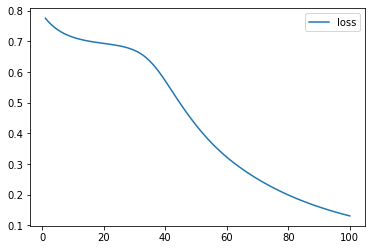

In [39]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

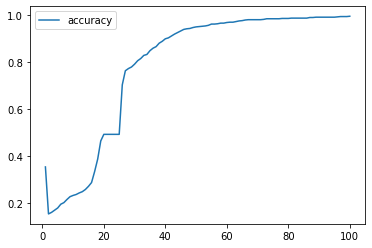

In [40]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [41]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.1215 - accuracy: 1.0000
Loss: 0.12152049690485, Accuracy: 1.0


In [42]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

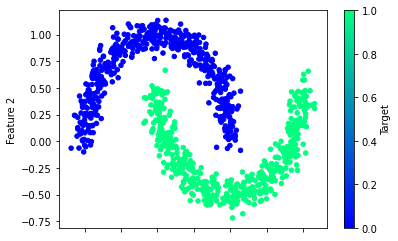

In [43]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [46]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [47]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4066 - accuracy: 0.8067
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4035 - accuracy: 0.8093
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4003 - accuracy: 0.8107
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3971 - accuracy: 0.8120
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3940 - accuracy: 0.8133
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3909 - accuracy: 0.8133
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3879 - accuracy: 0.8173
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3847 - accuracy: 0.8187
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3817 - accuracy: 0.8200
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3787 - accuracy: 0.8213
Epoch 11/

24/24 [==============================] - 0s 2ms/step - loss: 0.2675 - accuracy: 0.8920
Epoch 84/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2671 - accuracy: 0.8920
Epoch 85/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2668 - accuracy: 0.8920
Epoch 86/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2664 - accuracy: 0.8920
Epoch 87/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2661 - accuracy: 0.8920
Epoch 88/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2658 - accuracy: 0.8920
Epoch 89/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2656 - accuracy: 0.8920
Epoch 90/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2653 - accuracy: 0.8920
Epoch 91/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2650 - accuracy: 0.8920
Epoch 92/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2647 - accuracy: 0.8920
Epoch 93/100


<AxesSubplot:>

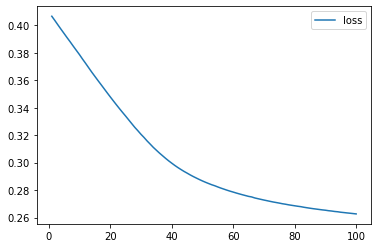

In [48]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

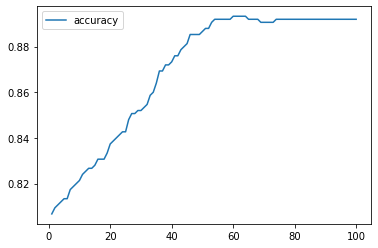

In [49]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [50]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [98]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 8

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [100]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=150, shuffle=True)


Epoch 1/150
24/24 [==============================] - 1s 2ms/step - loss: 0.6913 - accuracy: 0.5307
Epoch 2/150
24/24 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.5307
Epoch 3/150
24/24 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.5307
Epoch 4/150
24/24 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.5307
Epoch 5/150
24/24 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.5307
Epoch 6/150
24/24 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.5307
Epoch 7/150
24/24 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.5307
Epoch 8/150
24/24 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.5307
Epoch 9/150
24/24 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.5307
Epoch 10/150
24/24 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.5307
Epoch 11/

24/24 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.5307
Epoch 84/150
24/24 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.5307
Epoch 85/150
24/24 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.5307
Epoch 86/150
24/24 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.5307
Epoch 87/150
24/24 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.5307
Epoch 88/150
24/24 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.5307
Epoch 89/150
24/24 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.5307
Epoch 90/150
24/24 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.5307
Epoch 91/150
24/24 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.5307
Epoch 92/150
24/24 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5307
Epoch 93/150


In [101]:
df_moons.head()


,Feature 1,Feature 2,Target
0,0.676217,0.815220,0
1,1.487143,-0.210519,1
2,-1.027709,0.354966,0
3,0.236012,1.025531,0
4,1.856695,-0.042783,1


In [102]:
df_moons.describe()

,Feature 1,Feature 2,Target
count,1000.000000,1000.000000,1000.00000
mean,0.497459,0.249927,0.50000
std,0.867873,0.499273,0.50025
min,-1.183650,-0.718449,0.00000
25%,-0.062536,-0.206882,0.00000
50%,0.492127,0.249358,0.50000
75%,1.065532,0.701248,1.00000
max,2.156435,1.133889,1.00000


ValueError: Dimensions of labels and X must be compatible

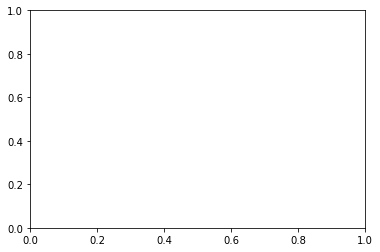

In [65]:
import matplotlib.pyplot as pyp

%matplotlib inline
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Feature1"]
fig, ax = pyp.subplots()
ax.boxplot(df_moons, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Findind outliers')
ax.set_ylabel('weight')
ax.set_yticks(np.arange(-2, 2.5, step=0.2))
ax.grid()
pyp.show()

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

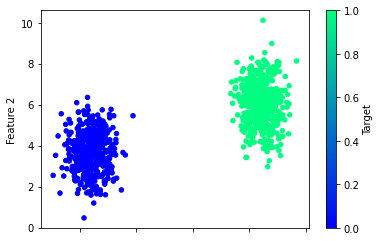

In [70]:
from sklearn.datasets import make_circles
X_circles, y_circles = make_circles(n_samples=100, shuffle=True, noise=None, random_state=None, factor=0.8)

# Creating a DataFrame to plot the nonlinear dummy data
df_circles = pd.DataFrame(X_circles, columns=["Feature 1", "Feature 2"])
df_circles["Target"] = y_circles

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

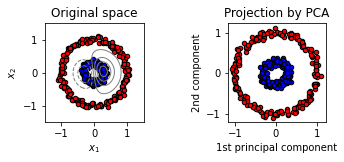

In [73]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

np.random.seed(0)

X, y = make_circles(n_samples=400, factor=.3, noise=.05)

kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)
X_back = kpca.inverse_transform(X_kpca)
pca = PCA()
X_pca = pca.fit_transform(X)

# Plot results

plt.figure()
plt.subplot(2, 2, 1, aspect='equal')
plt.title("Original space")
reds = y == 0
blues = y == 1

plt.scatter(X[reds, 0], X[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

X1, X2 = np.meshgrid(np.linspace(-1.5, 1.5, 50), np.linspace(-1.5, 1.5, 50))
X_grid = np.array([np.ravel(X1), np.ravel(X2)]).T
# projection on the first principal component (in the phi space)
Z_grid = kpca.transform(X_grid)[:, 0].reshape(X1.shape)
plt.contour(X1, X2, Z_grid, colors='grey', linewidths=1, origin='lower')

plt.subplot(2, 2, 2, aspect='equal')
plt.scatter(X_pca[reds, 0], X_pca[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_pca[blues, 0], X_pca[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Projection by PCA")
plt.xlabel("1st principal component")
plt.ylabel("2nd component")



# plt.tight_layout()
plt.show()